<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/03_Redes/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [1]:
import tensorflow as tf
import numpy as np

# Dataset

El "IMDB" es un conjunto de alrededor de 50.000 críticas positivas o negativas de películas de Internet Movie Database. Tomamos de TensorFlow el conjunto de datos. El argumento num_words es cuántas de las palabras más populares conservaremos. Todas las demás palabras "raras" serán descartadas.

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Partimos el dataset en 25mil observaciones para TRAIN

In [3]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


El dataset está preprocesado. Cada palabra esta encodeada con un número

In [4]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [8]:
# Cada review tiene un largo distinto
len(train_data[0])

218

In [9]:
len(train_data[1])

189

In [10]:
#La palabra con índice más alto es la palabra 9999
print(max([max(review) for review in train_data]))

9999


In [11]:
word_to_integer = tf.keras.datasets.imdb.get_word_index()

# Imprime las primeras 10 palabras del diccionario
print(list(word_to_integer.keys())[0:10])

integer_to_word = dict([(value, key) for (key, value) in word_to_integer.items()])

# Dado un número, imprimir la palabra
print(integer_to_word[1])
print(integer_to_word[2])

# Necesitamos restar 3 del índice porque 0 es "relleno", 1 es "inicio de secuencia" y 2 es "desconocido"
decoded_review = ' '.join([integer_to_word.get(i - 3, 'UNK') for i in train_data[0]])
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling']
the
and
UNK this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNK is an amazing actor and now the same being director UNK father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for UNK and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also UNK to the two little boy's that played the UNK of norman and paul they were just brilliant children are often left out of the UNK list i think because

La función vectorize_sequences sirve para convertir una lista de secuencias de palabras (representadas como listas de números enteros) en una matriz de números binarios, donde cada fila de la matriz representa una secuencia y cada columna representa una palabra del vocabulario.

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    # Creamos una matriz de todos ceros de tamaño (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

print(train_data.shape)
print(train_data[0])

# Vectorize the labels as well and reshape from (N, ) to (N, 1)
train_labels = np.reshape(np.asarray(train_labels, dtype=np.float32), (len(train_data), 1))
test_labels = np.reshape(np.asarray(test_labels, dtype=np.float32), (len(test_data), 1))

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [13]:
train_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

# Modelo

In [ ]:
# Create a model
model = tf.keras.Sequential()

 # input shape here is the length of our movie review vector
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['binary_accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
VAL_SIZE = 10000

val_data = train_data[:VAL_SIZE]
partial_train_data = train_data[VAL_SIZE:]


val_labels = train_labels[:VAL_SIZE]
partial_train_labels = train_labels[VAL_SIZE:]

In [ ]:
BATCH_SIZE = 512
SHUFFLE_SIZE = 1000

training_set = tf.data.Dataset.from_tensor_slices((partial_train_data, partial_train_labels))
training_set = training_set.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)

In [ ]:
EPOCHS = 10

# Store list of metric values for plotting later
tr_loss_list = []
tr_accuracy_list = []
val_loss_list = []
val_accuracy_list = []

for epoch in range(EPOCHS):
    for reviews, labels in training_set:
        # Calculate training loss and accuracy
        tr_loss, tr_accuracy = model.train_on_batch(reviews, labels)

    # Calculate validation loss and accuracy
    val_loss, val_accuracy = model.evaluate(val_data, val_labels)

    # Add to the lists
    tr_loss_list.append(tr_loss)
    tr_accuracy_list.append(tr_accuracy)
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    print(('Epoch #%d\t Training Loss: %.2f\tTraining Accuracy: %.2f\t'
           'Validation Loss: %.2f\tValidation Accuracy: %.2f') % (epoch + 1,
                                                                  tr_loss,
                                                                  tr_accuracy,
                                                                  val_loss,
                                                                  val_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8436 - loss: 0.4465
Epoch #1	 Training Loss: 0.57	Training Accuracy: 0.71	Validation Loss: 0.45	Validation Accuracy: 0.84
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8759 - loss: 0.3448
Epoch #2	 Training Loss: 0.43	Training Accuracy: 0.83	Validation Loss: 0.35	Validation Accuracy: 0.87
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8870 - loss: 0.3024
Epoch #3	 Training Loss: 0.35	Training Accuracy: 0.87	Validation Loss: 0.30	Validation Accuracy: 0.89
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8846 - loss: 0.2934
Epoch #4	 Training Loss: 0.30	Training Accuracy: 0.89	Validation Loss: 0.29	Validation Accuracy: 0.89
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8902 - loss: 0.2716
Epoch #5	 Training Loss: 0.27	Training Accuracy: 0.90	Validation Loss: 0.28	Validation Accuracy: 0.89
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8863 - loss: 0.280

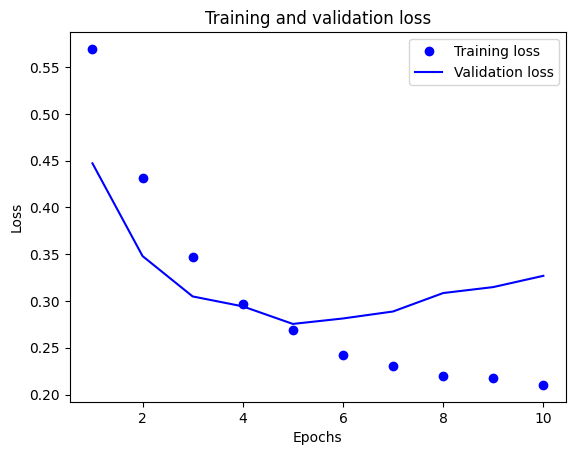

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, EPOCHS + 1)

# "bo" specifies "blue dot"
plt.plot(epochs, tr_loss_list, 'bo', label='Training loss')
# b specifies a "solid blue line"
plt.plot(epochs, val_loss_list, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

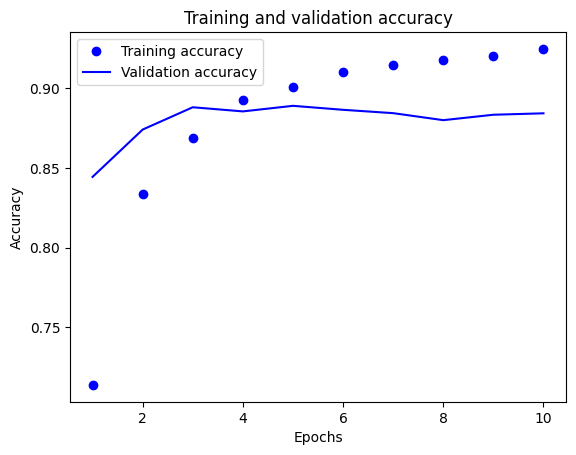

In [ ]:
plt.clf()   # Clear plot

plt.plot(epochs, tr_accuracy_list, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_list, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()